<a href="https://colab.research.google.com/github/darwinleung/testing/blob/master/Pokemon_TCG_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mulligan

In [4]:
import math
from math import comb
from math import perm

60 cards in deck, only X basic pokemons, draw 7 cards for starting hand, if none of the starting hand is pokemon, then will do a mulligan, what is the expected number of mulligan?

P(not mulligan) = P(at least 1 pokemon)

                   = 1 - P(zero pokemon)
                
                   = 1 - 56P7 / 60P7

In [141]:
def prob_of_mulligan(num_specific_card=4, total_cards=60, hand_size=7):
  print(comb(total_cards - num_specific_card, hand_size) / comb(total_cards, hand_size))
  return (perm(total_cards-num_specific_card,hand_size)/perm(total_cards,hand_size))

In [142]:
prob_of_mulligan(num_specific_card=4)

0.6005003742553344


0.6005003742553344

In [92]:
def expected_mulligans(prob):
    return 1/(1-prob)-1

In [93]:
expected_mulligans(prob_of_mulligan(4))

1.503131256095683

In [104]:
def n_mulligan_prob(num_specific_card=4, mulligan_count=0):
  p = 1-prob_of_mulligan(num_specific_card)
  return ((1-p)**mulligan_count)*p

In [105]:
n_mulligan_prob(4,0)

0.3994996257446656

In [129]:
def mulligan_count_prob(num_specific_card=4, n=10):
  prob = prob_of_mulligan(num_specific_card)
  print("Expected mulligan count: {:.02f}".format(expected_mulligans(prob)))
  sum = 0
  for i in range(n):
    sum += n_mulligan_prob(num_specific_card,i)
    print("Probability of having {} mulligans: {:.02f}%".format(i,n_mulligan_prob(num_specific_card,i)*100))
  print("Probability of having {}+ mulligans: {:.02f}%".format(n,(1-sum)*100))

In [132]:
mulligan_count_prob(1)

Expected mulligan count: 7.57
Probability of having 0 mulligans: 11.67%
Probability of having 1 mulligans: 10.31%
Probability of having 2 mulligans: 9.10%
Probability of having 3 mulligans: 8.04%
Probability of having 4 mulligans: 7.10%
Probability of having 5 mulligans: 6.27%
Probability of having 6 mulligans: 5.54%
Probability of having 7 mulligans: 4.90%
Probability of having 8 mulligans: 4.32%
Probability of having 9 mulligans: 3.82%
Probability of having 10+ mulligans: 28.92%


Expected mulligan count: 1.50
Probability of having 0 mulligans: 39.95%
Probability of having 1 mulligans: 23.99%
Probability of having 2 mulligans: 14.41%
Probability of having 3 mulligans: 8.65%
Probability of having 4 mulligans: 5.19%
Probability of having 5 mulligans: 3.12%
Probability of having 6 mulligans: 1.87%
Probability of having 7 mulligans: 1.12%
Probability of having 8 mulligans: 0.68%
Probability of having 9 mulligans: 0.41%
Probability of having 10 mulligans: 0.24%


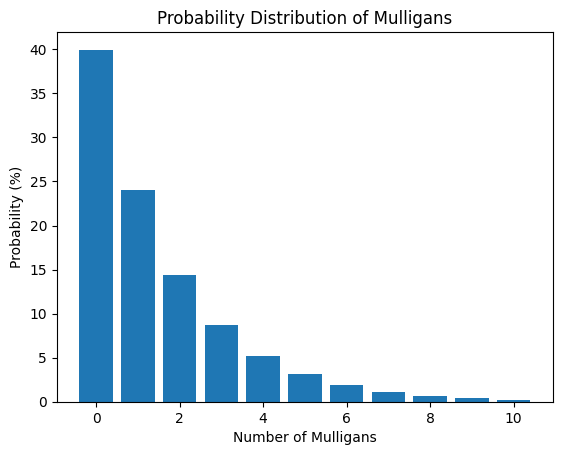

In [137]:
# prompt: build a bar chart to show the probability distribution above

import matplotlib.pyplot as plt

def mulligan_count_prob_chart(num_specific_card=4, n=10):
  prob = prob_of_mulligan(num_specific_card)
  print("Expected mulligan count: {:.02f}".format(expected_mulligans(prob)))
  x_axis = []
  y_axis = []
  # sum = 0
  for i in range(n+1):
    x_axis.append(i)
    y = n_mulligan_prob(num_specific_card,i)*100
    y_axis.append(y)
    # sum += n_mulligan_prob(num_specific_card,i)
    print("Probability of having {} mulligans: {:.02f}%".format(i,y))
  # print("Probability of having {}+ mulligans: {:.02f}%".format(n,(1-sum)*100))
  plt.bar(x_axis,y_axis)
  plt.xlabel("Number of Mulligans")
  plt.ylabel("Probability (%)")
  plt.title("Probability Distribution of Mulligans")
  plt.show()

mulligan_count_prob_chart(4)


# No. of specific cards in starting hands

In [99]:
1-prob_of_mulligan(2, 59, 7)

0.22501461133839862

\[
P(K=0) = \frac{\binom{X}{0} \cdot \binom{N-X}{n}}{\binom{N}{n}}
\]\

\[
P(K=0) = \frac{\binom{X}{0} \cdot \binom{N-X}{n}}{\binom{N}{n}}
\]

In [73]:
# prompt: write a function to calculate the probability of drawing 7 cards with k number of a certain card in a 60 cards deck

def prob_k_cards(k, num_specific_card=4, total_cards=59, hand_size=7):
  """
  Calculates the probability of drawing exactly k specific cards in a hand.

  Args:
    k: The number of specific cards to draw.
    total_cards: The total number of cards in the deck.
    hand_size: The size of the hand being drawn.
    num_specific_card: The number of specific cards in the deck.

  Returns:
    The probability of drawing exactly k specific cards.
  """
  return (comb(num_specific_card, k) * comb(total_cards - num_specific_card, hand_size - k)) / comb(total_cards, hand_size)


In [100]:
prob_k_cards(0,2)

0.7749853886616014

In [101]:
sum = 0
for i in range(5):
  sum += prob_k_cards(i,2)
  print(prob_k_cards(i,2))
print(sum)

0.7749853886616014
0.21274108708357686
0.012273524254821741
0.0
0.0
1.0


In [110]:
def specific_card_count_prob(num_specific_card=4):
  for i in range(num_specific_card+1):
    print("Probability of having {} specific cards: {:.02f}%".format(i,prob_k_cards(i,num_specific_card)*100))

In [118]:
specific_card_count_prob(1)

Probability of having 0 specific cards: 88.14%
Probability of having 1 specific cards: 11.86%


# Probability of prizing a specific card

# Probability of starting with that 1 bad starter
e.g. luminion

## Appendix

Resources:
https://sixprizes.com/2013/01/13/themathtcg-the-probabilities-behind/#39577-3-1-the-probability-of-not-having-a-mulligan
https://www.pojo.com/Features/X-Act/2005/Odds%20in%20Pokemon%203.htm
https://limitlesstcg.com/tools/drawcalc
https://www.justinbasil.com/guide/appendix4
